In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.shape

(150, 4)

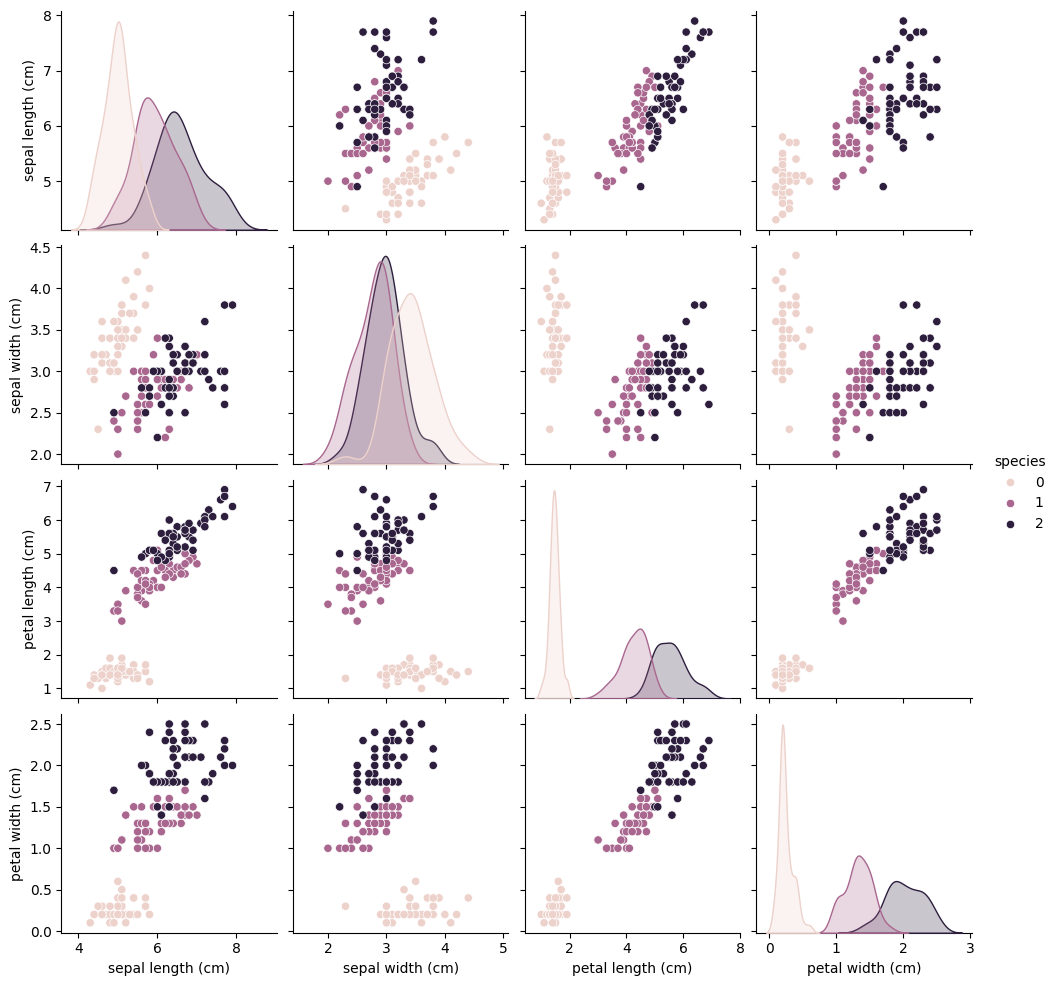

In [8]:
df['species'] = iris.target  # just to color by true labels for insight
sns.pairplot(df, hue='species')
plt.show()

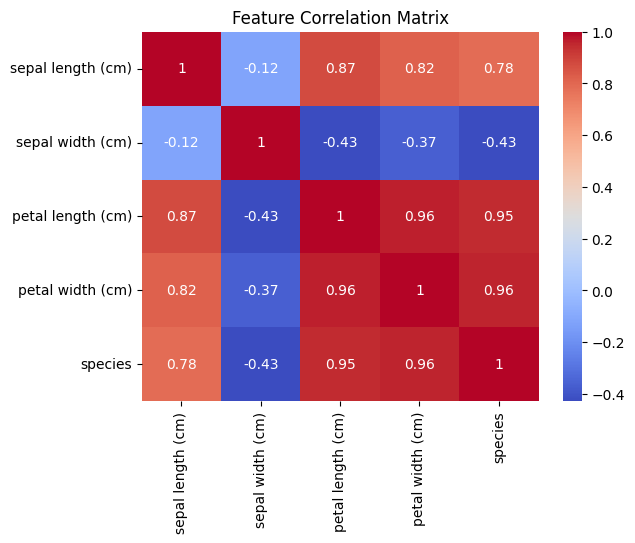

In [9]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()



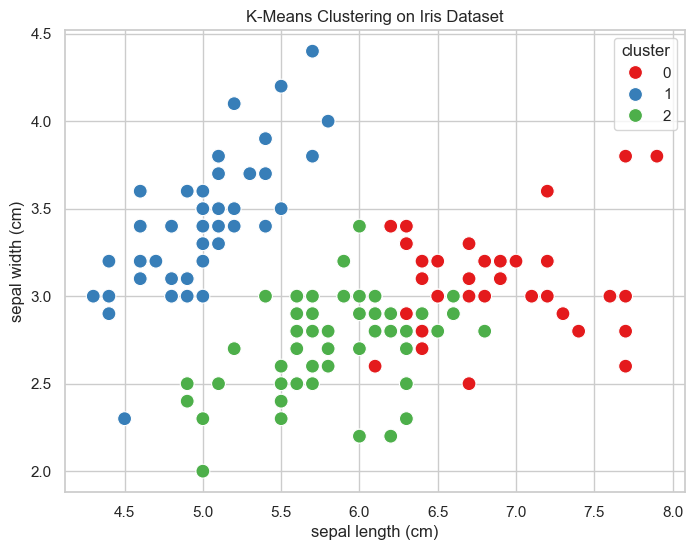

In [34]:
df = pd.DataFrame(X, columns=iris.feature_names)

# Initialize KMeans with 3 clusters (since Iris has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_predict= kmeans.predict(X_test)
# Cluster labels
labels = kmeans.labels_

# Add cluster labels to dataframe
df['cluster'] = labels

# Plot using first two features for visualization
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1], hue='cluster', palette='Set1', s=100)
plt.title("K-Means Clustering on Iris Dataset")
plt.show()

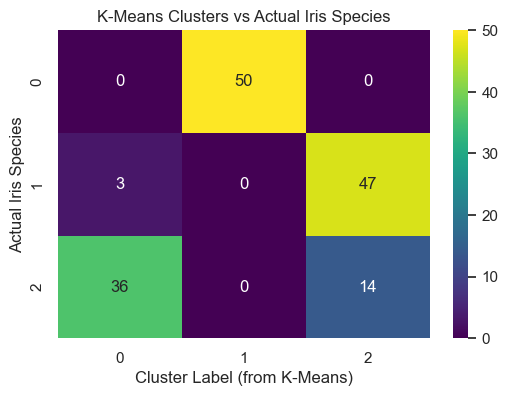

In [24]:
sns.set(style="whitegrid")

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(comparison_table, annot=True, cmap="viridis", fmt="d")
plt.title("K-Means Clusters vs Actual Iris Species")
plt.xlabel("Cluster Label (from K-Means)")
plt.ylabel("Actual Iris Species")
plt.show()

In [12]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
true_labels = iris.target
pred_labels = labels

ari = adjusted_rand_score(true_labels, pred_labels)
nmi = normalized_mutual_info_score(true_labels, pred_labels)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

Adjusted Rand Index (ARI): 0.716
Normalized Mutual Information (NMI): 0.742


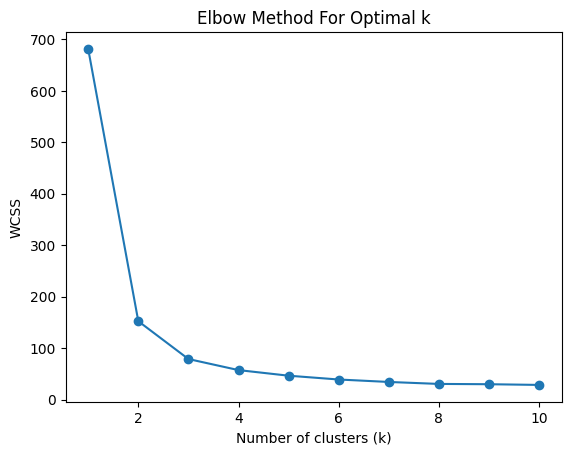

In [13]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()


In [14]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f'k={k}, Silhouette Score={score:.3f}')


k=2, Silhouette Score=0.681
k=3, Silhouette Score=0.551
k=4, Silhouette Score=0.498
k=5, Silhouette Score=0.493
k=6, Silhouette Score=0.368
k=7, Silhouette Score=0.354
k=8, Silhouette Score=0.345
k=9, Silhouette Score=0.316
k=10, Silhouette Score=0.301


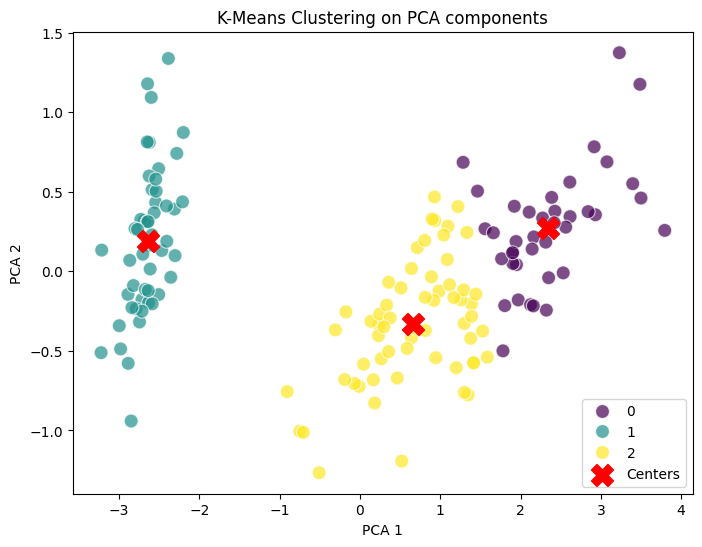

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette='viridis', s=100, alpha=0.7)

# Plot cluster centers
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X', label='Centers')

plt.title("K-Means Clustering on PCA components")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


Silhouette Score for k=3: 0.551


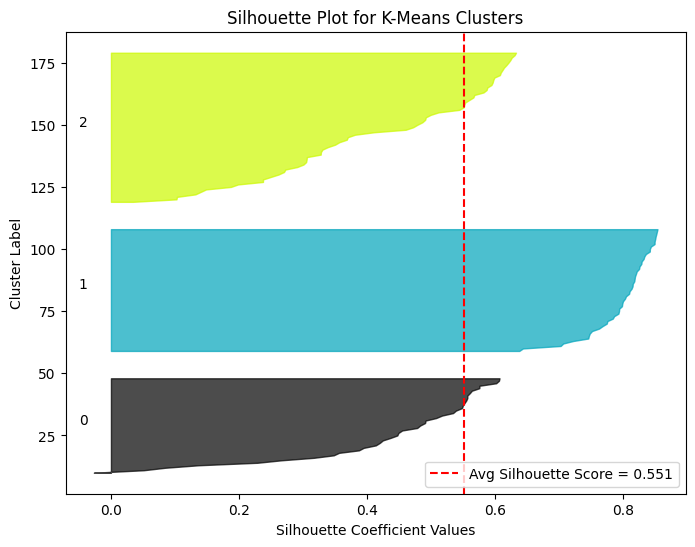

In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

sil_score = silhouette_score(X, clusters)
print(f"Silhouette Score for k=3: {sil_score:.3f}")

sample_silhouette_values = silhouette_samples(X, clusters)

plt.figure(figsize=(8,6))
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 

plt.title("Silhouette Plot for K-Means Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.axvline(x=sil_score, color="red", linestyle="--", label=f"Avg Silhouette Score = {sil_score:.3f}")
plt.legend()
plt.show()


In [21]:
df_comparison = pd.DataFrame({
    'Actual': iris.target,
    'Cluster': clusters
})

comparison_table = pd.crosstab(df_comparison['Actual'], df_comparison['Cluster'],
                                rownames=['Actual'], colnames=['Cluster'])

print("Comparison of K-Means Clusters with Actual Iris Species:")
print(comparison_table)


Comparison of K-Means Clusters with Actual Iris Species:
Cluster   0   1   2
Actual             
0         0  50   0
1         3   0  47
2        36   0  14


In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))

Confusion Matrix:
[[ 0 19  0]
 [ 0  0 13]
 [10  0  3]]


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

Precision: 0.05
Recall:    0.07
F1 Score:  0.06
